# SyriaTel Communications Project: Customer Churn (Binary Classification)

## Business Understanding

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

### The Problem

The problem, put forth by SyriaTel, is that they have a customer churn rate in their dataset of nearly 14.5%. An acceptable churn rate is 5-7% annually. Therefore, the true problem to solve with this dataset is to understand the features affecting customer churn, and to what degree. This will empower SyriaTel with the knowledge to lower customer churn by at least 7%.

This is a binary classification problem. 

The reason that customer churn matters is because it is more expensive to find new customers than to retain current customers. Therefore, when considering solutions for this problem, expenses of solutions should be considered. 

### Customer Churn Reduction Strategies:


- Offer Incentives: Regarded as the most effective
- Targeting Correct Audience
- Providing Better Service
- Understanding Complaints and Solving at the Source: 96% of unhappy customers don't complain. 91% of those customers just leave and dont come back. 
- Use your best Sales People on Retention
- Flaunt Competitive Advantages
- Offer Long Term Contracts
- Analyzing Cause of Churn
- Engaging with Customers (Relationship Marketing)
- Customer Education (Training)
- Identify Customer Risk Factors
- Define Most Valuable Customers
- Segment Customers: Customers can be segmented into groups of 
     - Profitablity
     - Readiness to Leave
     - Likelihood to Positively Respond to Offer
     


### Customer Experience

SyriaTel is a phone provider. Understanding the pain points of the customer experience is essential. Some of the factors that SyriaTel should take into consideration as they approach the findings of the data are:
 - Monthly Costs
 - Network Strength
 - Costs of Contract Initiation
 - Costs of Contract Cancellation
 - SyriaTel Costs v. Competition Costs by Region
 - Any Customer Interaction Via Employees or Ads
 - Obstacles of Internal/External Troubleshooting
 - Transparency for customers in Usage to Cost Relationship
 - Unexpected Charges (Potentially from International Calls without an International Plan)

## Data Understanding

The data has been provided by Kaggle. Details on the units for the account length feature can be pulled from other sources. 

The target will be the churn feature. Other features may be added to the df to better predict churn. 

There is enough data to build a model for SyriaTel to analyze their customer churn at this specific point in time. However, more data would be needed for a more robust model. 

### Importing Relevant Packages

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools
from imblearn.over_sampling import SMOTE, ADASYN
import imblearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt
import shap

### Optional: Avoiding Truncating

In [2]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 150)

### Loading Data

In [3]:
df = pd.read_csv('data/Kaggle_Customer_Churn_Dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Number of Rows

In [4]:
len(df)

3333

### Number of Elements in Dataframe

In [5]:
df.size

69993

### Churners versus Non-Churners

Class imbalance is evident.

In [6]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

## Data Assumptions

- All of the data was captured at one point in time.
- The data represents a bill over a one month duration.
- Each row represents a unique phone number. (Confirmed in Data Preparation)
- Each phone number represents one account.
- The company is charging in dollars.

## Data Preparation

### Viewing the Data

In [8]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Viewing Value Counts for Churn

In [9]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

### Inspecting the Data for NaN Values

In [10]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Observing Column Titles

In [11]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Renaming Column Titles to Remove Spaces

In [12]:
df.rename(columns={'account length':'account_length', 'area code': 'area_code', 'phone number': 'phone_number', 'international plan': 'intl_plan', 'voice mail plan': 'vmail_plan', 'number vmail messages': 'qty_vmails', 'total day minutes':'sum_day_mins','total day calls':'sum_day_calls', 'total day charge':'total_day_charge', 'total eve minutes':'sum_eve_mins', 'total eve calls': 'sum_eve_calls', 'total eve charge': 'total_eve_charge', 'total night minutes':'sum_night_mins', 'total night calls':'sum_night_calls', 'total night charge': 'total_night_charge', 'total intl minutes':'sum_intl_mins', 'total intl calls': 'sum_intl_calls', 'total intl charge': 'total_intl_charge', 'customer service calls': 'cust_serv_calls'}, inplace = True)

### Inspecting New Column Titles

In [13]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'vmail_plan', 'qty_vmails', 'sum_day_mins', 'sum_day_calls',
       'total_day_charge', 'sum_eve_mins', 'sum_eve_calls', 'total_eve_charge',
       'sum_night_mins', 'sum_night_calls', 'total_night_charge',
       'sum_intl_mins', 'sum_intl_calls', 'total_intl_charge',
       'cust_serv_calls', 'churn'],
      dtype='object')

### Inspecting Column Atributes

In [14]:
df.describe()

,account_length,area_code,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Confirming Uniqueness of Phone Numbers

Each row represents one phone line.

In [15]:
df.phone_number.nunique()


3333

### Looking at Value Counts for Voicemail

In [16]:
df.qty_vmails.value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: qty_vmails, dtype: int64

### Looking at Value Counts for Account Length

One can assume that the account length is in terms of months. Ultimately this would need to be confirmed with the company.

In [17]:
#Remove Truncation

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 150)

In [18]:
df.account_length.value_counts().sort_index()

1      8
2      1
3      5
4      1
5      1
      ..
221    1
224    2
225    2
232    1
243    1
Name: account_length, Length: 212, dtype: int64

### Average Account Length: 8.5 Years

The average account length is 101 months or roughly 8.5 years.

In [19]:
df.account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [20]:
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

In [21]:
df.intl_plan.value_counts()

no     3010
yes     323
Name: intl_plan, dtype: int64

### Dropping the Phone Number Feature

In [22]:
df.drop(columns='phone_number', inplace = True)

### Replace False and No with Zero

In [23]:
df.replace(False, 0, inplace = True)
df.replace('no', 0, inplace = True)

### Replace True and Yes with One

In [24]:
df.replace(True, 1, inplace = True)
df.replace('yes', 1, inplace = True)

### Dummify the States & Drop the First Row


We are keeping the states to see if geographic area is a determinant, perhaps due to competition. 

In [25]:
df.columns

Index(['state', 'account_length', 'area_code', 'intl_plan', 'vmail_plan', 'qty_vmails', 'sum_day_mins', 'sum_day_calls', 'total_day_charge',
       'sum_eve_mins', 'sum_eve_calls', 'total_eve_charge', 'sum_night_mins', 'sum_night_calls', 'total_night_charge', 'sum_intl_mins',
       'sum_intl_calls', 'total_intl_charge', 'cust_serv_calls', 'churn'],
      dtype='object')

In [26]:
dum_df = pd.get_dummies(df, drop_first = True)
df = dum_df

### Feature Engineering: Monthly Charge

The new feature 'monthly_charge is the sum of the monthly charges.

In [27]:
df['monthly_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge'])


# Space intentionally left for scrolling.

In [28]:
df.monthly_charge.describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: monthly_charge, dtype: float64

### Feature Engineering: Total Charge

The new feature 'total_charge' is the total revenue by customer for the entirety of the relationship of the customer. It was constructed by adding the monthly charges and multiplying by the account length.

In [29]:
df['total_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']) * df['account_length']

In [30]:
df.total_charge.describe()

count     3333.000000
mean      6008.885668
std       2627.457674
min         45.420000
25%       4138.880000
50%       5785.700000
75%       7750.260000
max      16966.560000
Name: total_charge, dtype: float64

### Finding Lifetime Total Revenue

The total lifetime revenue from customer charges is roughly $20,000,000.

In [31]:
df.total_charge.sum()

20027615.93

### Finding Revenue of This Month

In [32]:
df.monthly_charge.sum()

198146.03

### Revenue of Cancelled Customers

Revenue of customers who are cancelling.

In [33]:
df_stay = df[['monthly_charge', 'churn']].copy()  

In [34]:
 df_stay = df_stay[df_stay.churn != False]

In [35]:
df_stay.monthly_charge.sum()

31566.93

### Calculating the Percent of Monthly Revenue Lost This Month

In [36]:
percent_lost = (31566.93 / 198146.03) * 100
percent_lost

15.931144318157674

### Summarization of Class Distribution

1 represents the customers who are cancelling.

In [37]:
df.churn.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

### Depicting Nature of Class Imbalance

df_true represents where customer churn is True.

In [38]:
df_true =  df[df.churn == 1.0]
df_true.shape

(483, 71)

In [39]:
df_false =  df[df.churn == 0.0]
df_false.shape

(2850, 71)

In [40]:
df_true.churn.value_counts() 

1.0    483
Name: churn, dtype: int64

In [41]:
df_false.churn.value_counts()

0.0    2850
Name: churn, dtype: int64

### Scatter Plot of Class Imbalance

You can see a line of cancelling customers above the staying ones, indicating higher spend for cancelling customers.

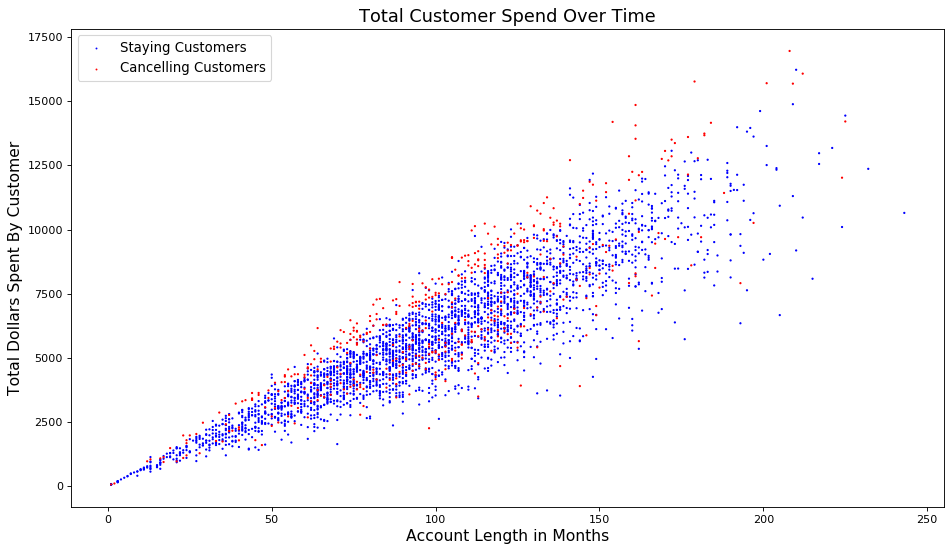

In [42]:
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(df.account_length, df.total_charge, df.churn == 0, c="blue", label = 'Staying Customers')
plt.scatter(df.account_length, df.total_charge, df.churn == 1, c="red", label = 'Cancelling Customers')
plt.title("Total Customer Spend Over Time", fontsize = 16)
plt.xlabel("Account Length in Months", fontsize = 14)
plt.ylabel("Total Dollars Spent By Customer", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'center')
plt.legend(fontsize= 12)
plt.tight_layout()
plt.show()

### Correcting for Class Imbalance with SMOTE (Synthetic Minority Oversampling Technique)

### Defining X and Y

In [43]:
X = df.drop(columns='churn')
y = df.churn

### Transforming the Dataset

In [44]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

### Checking the New Class Sizes

In [45]:
y.value_counts()

1.0    2850
0.0    2850
Name: churn, dtype: int64

In [46]:
X.shape

(5700, 70)

### Noting the Scatterplot with SMOTE

The scatterplot shows trends similar to the non-SMOTE data but with balance among the classes.

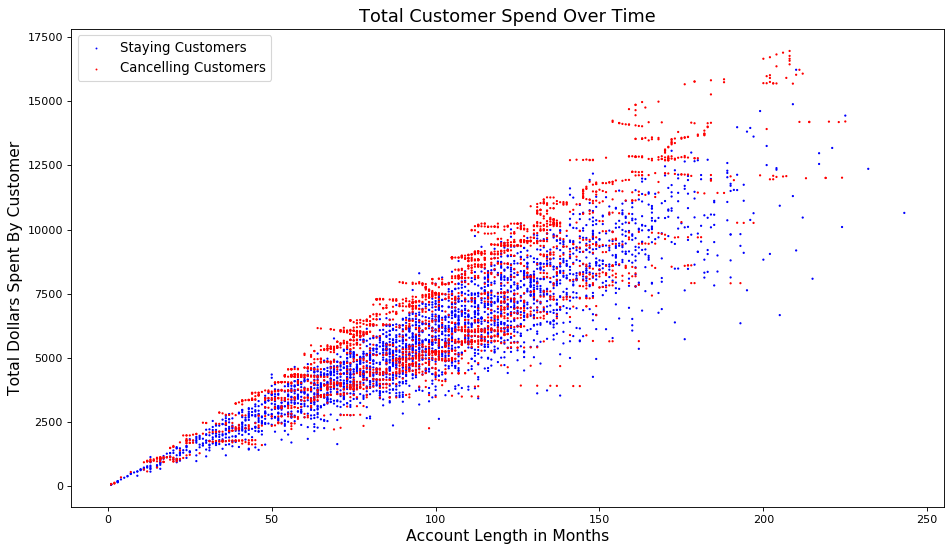

In [47]:
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(X.account_length, X.total_charge, y == 0, c="blue", label = 'Staying Customers')
plt.scatter(X.account_length, X.total_charge, y == 1, c="red", label = 'Cancelling Customers')
plt.title("Total Customer Spend Over Time", fontsize = 16)
plt.xlabel("Account Length in Months", fontsize = 14)
plt.ylabel("Total Dollars Spent By Customer", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'center')
plt.legend(fontsize= 12)
plt.tight_layout()
plt.show()

### Train Test Split

A random state of 42 will be used to stabilize the results. 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
y_train

43      0.0
1891    0.0
3195    0.0
3442    1.0
4991    1.0
       ... 
3772    1.0
5191    1.0
5226    1.0
5390    1.0
860     0.0
Name: churn, Length: 4560, dtype: float64

In [50]:
print('Training Set: ')
print(y_train.value_counts())
print('Normalized:')
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print('Test Set')
print(y_test.value_counts())
print('Normalized:')
print(y_test.value_counts(normalize=True))

Training Set: 
1.0    2295
0.0    2265
Name: churn, dtype: int64
Normalized:
1.0    0.503289
0.0    0.496711
Name: churn, dtype: float64


Test Set
0.0    585
1.0    555
Name: churn, dtype: int64
Normalized:
0.0    0.513158
1.0    0.486842
Name: churn, dtype: float64


### Seeking a Model to Maximize Recall:

Having a false negative (Type II Error), would mean that the model is predicting that the customer is not going to cancel when they actually are. For this reason, priority is given to the metric of recall.

### Logistic Regression Model

AUC: 0.9632340032340033


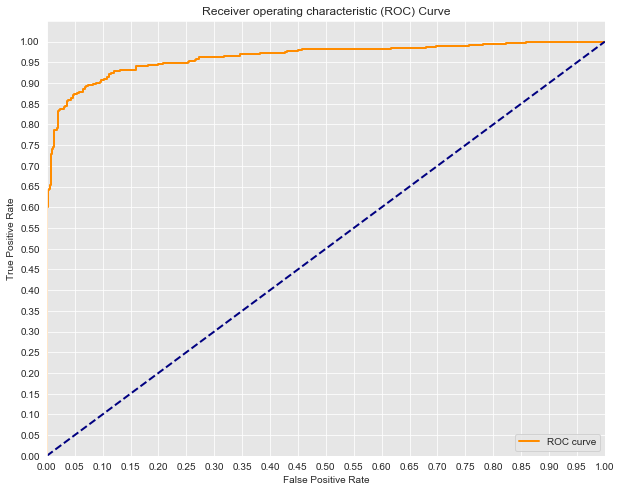

In [51]:
# Initial Model #what does the solver indicate?
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
y_pred = logreg.predict(X_test)

### Logistic Regression Evaluation

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[545,  40],
       [ 62, 493]])

In [54]:
recall_score(y_test, y_pred)

0.8882882882882883

### Confusion Matrix Breakdown:
 - 542 True Negatives: Predicting that they will not cancel and being correct.
 - 43 False Positives: Predicting that they will cancel and being wrong. 
 - 59 False Negatives: Predicting that they're not going to cancel and being wrong.
 - 496 True Positive: Predicting that they will cancel and being correct.

# K-Nearest Neighbors Model

In [55]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)

In [56]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7180851063829787
Recall Score: 0.972972972972973
Accuracy Score: 0.8008771929824562
F1 Score: 0.8263198163733743


In [57]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

# K-Nearest Neighbors Evaluation

In [58]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
Recall: 0.9783783783783784


In [59]:
SEED = 1

In [60]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [61]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9012012012012012

In [62]:
recall_score(y_test, y_pred)

0.9135135135135135

# Decision Tree Model

In [63]:
#check back to classifier opt lab to make sure you are choosing these right

Descision Tree with Default Settings

In [64]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state= SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5363363363363363

In [65]:
print('Recall: ', recall_score(y_test, y_pred))

Recall:  0.7837837837837838


# Tuning the Decision Tree Model

Train AUC, and Test AUC will be indicative of training and test error for learning.

### Identifying Ideal Maximum Tree Depth

4 is the ideal maximum tree depth. Greater tree depth is indicative of overfitting as Train AUC soars above Test AUC. 

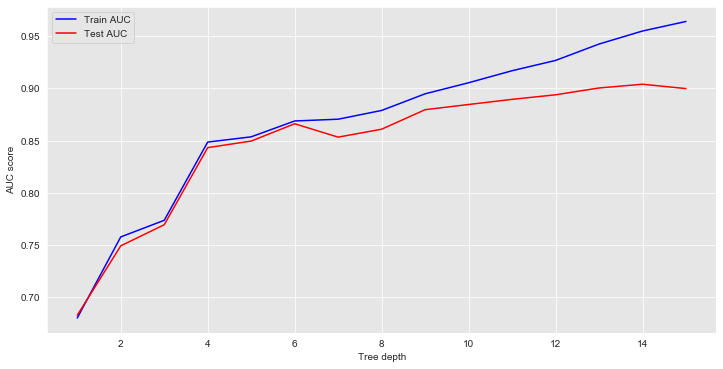

In [66]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


### Identifying Ideal Minimum Sample Split

.2 would be the ideal number for sample split. Larger split does not improve learning. 

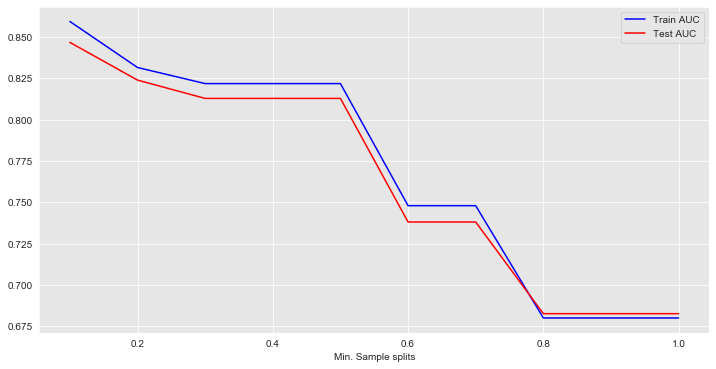

In [67]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

### Identifying Ideal Minimum Sample Leafs

AUC for Training and test are best at .054 where they intersect.

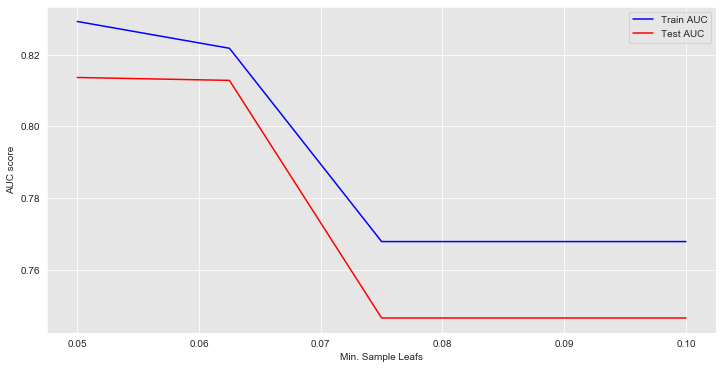

In [68]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.05, .1, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

### Identifying Ideal Maximum Features

Best fit number is 28.

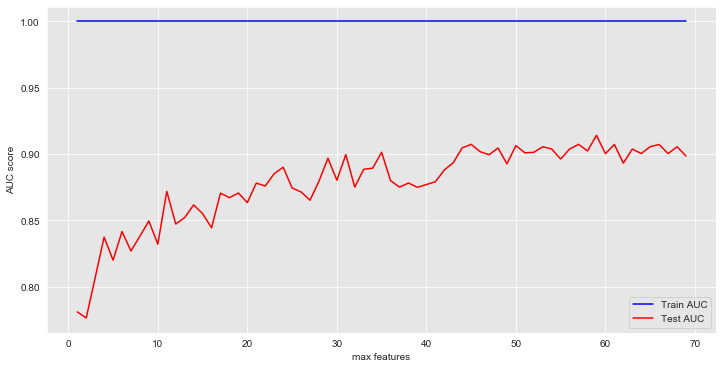

In [69]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

### Retraining the Classifier with Optimal Values

In [70]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=28,
                           max_depth=4,
                           min_samples_split=0.2,
                           min_samples_leaf=0.054, 
                           random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7324786324786325

In [71]:
recall_score(y_test, y_pred) 

0.6

In [72]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[506  79]
 [222 333]]
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       585
         1.0       0.81      0.60      0.69       555

    accuracy                           0.74      1140
   macro avg       0.75      0.73      0.73      1140
weighted avg       0.75      0.74      0.73      1140



In [73]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 73.6%


In [74]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.09458788, 0.        ,
       0.36488817, 0.        , 0.07005618, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27037914, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.20008863, 0.        ])

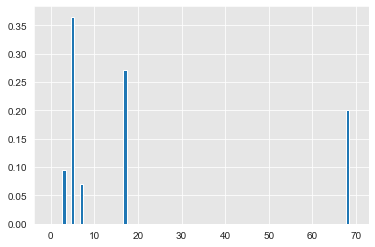

In [75]:
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)
plt.show()

# Bagging Trees + Decision Tree Model

In [76]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20, random_state = SEED)

In [77]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20, random_state=1)

In [78]:
bagged_tree.score(X_train, y_train)


0.8695175438596491

In [79]:
bagged_tree.score(X_test, y_test)

0.8710526315789474

In [80]:
y_pred = bagged_tree.predict(X_test)

### Bagging increased recall.

In [81]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[582   3]
 [144 411]]
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89       585
         1.0       0.99      0.74      0.85       555

    accuracy                           0.87      1140
   macro avg       0.90      0.87      0.87      1140
weighted avg       0.89      0.87      0.87      1140



### Optimizing for Entropy

In [82]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20, random_state = SEED)

In [83]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20, random_state=1)

In [84]:
bagged_tree.score(X_train, y_train)


0.8537280701754386

In [85]:
bagged_tree.score(X_test, y_test)

0.8535087719298246

In [86]:
y_pred = bagged_tree.predict(X_test)

### Optimizing for entropy increased precision and f1 score only.

In [87]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[585   0]
 [167 388]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       585
         1.0       1.00      0.70      0.82       555

    accuracy                           0.85      1140
   macro avg       0.89      0.85      0.85      1140
weighted avg       0.89      0.85      0.85      1140



### Optimizing for Max Depth

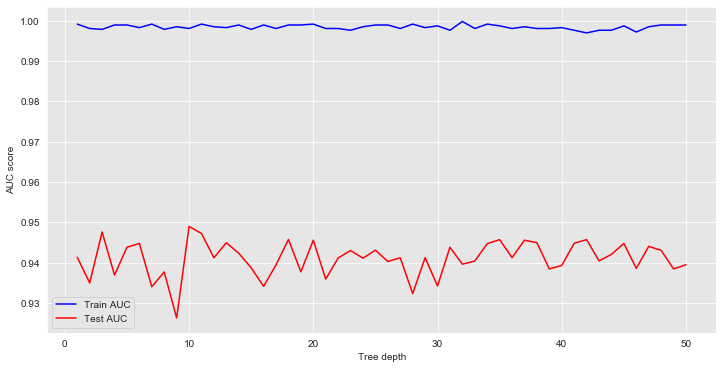

In [88]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state = SEED), n_estimators=20)   
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

### Optimised at 8.

In [89]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth= 8), 
                                 n_estimators=20, random_state = SEED)

In [90]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=8),
                  n_estimators=20, random_state=1)

In [91]:
bagged_tree.score(X_train, y_train)


0.8914473684210527

In [92]:
bagged_tree.score(X_test, y_test)

0.8859649122807017

In [93]:
y_pred = bagged_tree.predict(X_test)

### Optimizing for max depth increased recall.

In [94]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[576   9]
 [121 434]]
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       585
         1.0       0.98      0.78      0.87       555

    accuracy                           0.89      1140
   macro avg       0.90      0.88      0.88      1140
weighted avg       0.90      0.89      0.88      1140



# Gradient Boost Model

In [95]:
gbt_clf = GradientBoostingClassifier(random_state=42)

In [96]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [97]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

### Training Scores

In [98]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.9930624380574826
Recall Score: 0.873202614379085
Accuracy Score: 0.9331140350877193
F1 Score: 0.929283561326223


### Testing Scores

In [99]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.9798387096774194
Recall Score: 0.8756756756756757
Accuracy Score: 0.9307017543859649
F1 Score: 0.9248334919124643


In [100]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       585
         1.0       0.98      0.88      0.92       555

    accuracy                           0.93      1140
   macro avg       0.94      0.93      0.93      1140
weighted avg       0.94      0.93      0.93      1140



# Adaboost Model

In [101]:
adaboost_clf = AdaBoostClassifier(random_state=42)

In [102]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [103]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

### Training Scores

In [104]:
print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.9139834406623735
Recall Score: 0.8657952069716776
Accuracy Score: 0.8914473684210527
F1 Score: 0.889236965764153


### Testing Scores

In [105]:
print_metrics(y_test, adaboost_test_preds)

Precision Score: 0.8756756756756757
Recall Score: 0.8756756756756757
Accuracy Score: 0.8789473684210526
F1 Score: 0.8756756756756757


# Random Forest Model

In [106]:
forest = RandomForestClassifier(n_estimators=20, max_depth= 8)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20)

In [107]:
y_pred = forest.predict(X_test)

In [108]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[562  23]
 [136 419]]
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       585
         1.0       0.95      0.75      0.84       555

    accuracy                           0.86      1140
   macro avg       0.88      0.86      0.86      1140
weighted avg       0.87      0.86      0.86      1140



In [109]:
forest.score(X_train, y_train)

0.8826754385964912

In [110]:
forest.score(X_test, y_test)

0.8605263157894737

# XGBoost Model

In [111]:
xg = XGBClassifier(random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 93.2%
Validation accuracy: 93.51%
Training Recall: 86.93%
Test Recall: 87.39%


# Tuning XGBoost Model with GridSearchCV

In [112]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [113]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 98.68%
Validation accuracy: 97.19%
Training Recall: 97.47%
Test Recall: 95.86%


# XGBoost with Optimal Parameters

### The Optimal Parameters Increased

In [114]:
xg = XGBClassifier(max_depth = 6, learning_rate = .1, n_estimators = 100, min_child_weight = 1, subsample = .7, random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 96.86%
Validation accuracy: 95.88%
Training Recall: 94.03%
Test Recall: 93.33%


In [115]:
xg.feature_importances_

array([0.00809362, 0.0452663 , 0.01928892, 0.06869596, 0.08647458,
       0.00733315, 0.00727243, 0.        , 0.01138964, 0.01041681,
       0.01452609, 0.00901929, 0.00783297, 0.01810946, 0.01241462,
       0.02880192, 0.02624983, 0.05699285, 0.01166934, 0.008818  ,
       0.01085558, 0.        , 0.01213554, 0.00833088, 0.00700005,
       0.00874679, 0.00958327, 0.00951922, 0.00925447, 0.01019685,
       0.00963623, 0.01054506, 0.01099376, 0.00891436, 0.01113345,
       0.00890429, 0.00966597, 0.00948146, 0.00850512, 0.00857981,
       0.01098483, 0.00969675, 0.01084123, 0.01140172, 0.00851345,
       0.01004518, 0.01074066, 0.00778985, 0.0065668 , 0.01143631,
       0.00926004, 0.00971087, 0.01066107, 0.00945834, 0.01009285,
       0.        , 0.01052742, 0.        , 0.01151242, 0.0091663 ,
       0.00850089, 0.01015151, 0.01135544, 0.01203783, 0.00906939,
       0.01202119, 0.01459423, 0.01102635, 0.08114162, 0.0110474 ],
      dtype=float32)

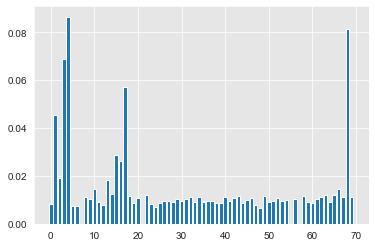

In [116]:
plt.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
plt.show()

### Importance of Features From the XGBoost Model

Features can be eliminated through tuning. 

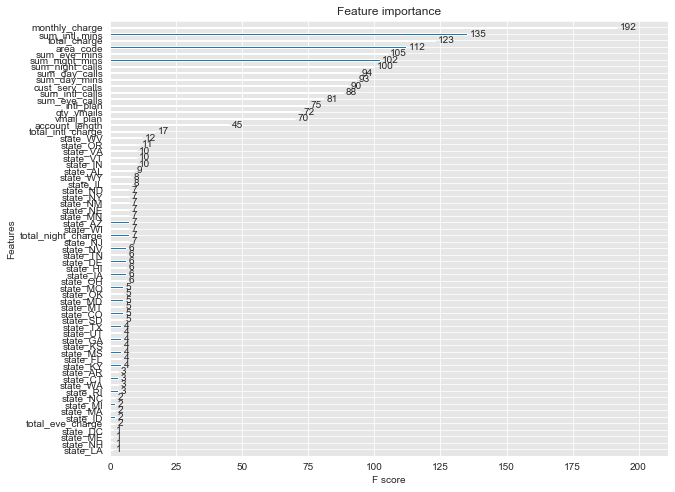

In [117]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xg, ax=ax)

### Top Features to Include in Tuning

- Monthly Charge
- Sum of International Minutes
- Total Charge
- Area Code
- Sum of Evening Minutes
- Sum of Night Minutes
- Sum of Night Calls
- Sum of Day Calls
- Sum of Day Minutes
- Customer Service Calls
- Sum of International Calls
- Sum of Evening Calls

### Tuning with Only top 12 Important Features

In [119]:
df.head()

,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls,churn,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,...,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,monthly_charge,total_charge
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75.56,9671.68
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.24,6338.68
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62.29,8533.73
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66.80,5611.20
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.09,3906.75


In [118]:
im_df = df[['monthly_charge', 'sum_intl_mins', 'total_charge', 'area_code', 'sum_eve_mins', 'sum_night_mins', 'sum_night_calls', 'sum_day_calls', 'sum_day_mins', 'cust_serv_calls', 'sum_intl_calls', 'sum_eve_calls', 'churn']]

In [120]:
im_df.head()

,monthly_charge,sum_intl_mins,total_charge,area_code,sum_eve_mins,sum_night_mins,sum_night_calls,sum_day_calls,sum_day_mins,cust_serv_calls,sum_intl_calls,sum_eve_calls,churn
0,75.56,10.0,9671.68,415,197.4,244.7,91,110,265.1,1,3,99,0.0
1,59.24,13.7,6338.68,415,195.5,254.4,103,123,161.6,1,3,103,0.0
2,62.29,12.2,8533.73,415,121.2,162.6,104,114,243.4,0,5,110,0.0
3,66.80,6.6,5611.20,408,61.9,196.9,89,71,299.4,2,7,88,0.0
4,52.09,10.1,3906.75,415,148.3,186.9,121,113,166.7,3,3,122,0.0


In [121]:
X = im_df.drop(columns = 'churn')
y = im_df.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost with Top Feature Selection

In [122]:
xg = XGBClassifier(random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 93.92%
Validation accuracy: 93.1%
Training Recall: 66.49%
Test Recall: 65.35%


# XGBoost with Top Feature Selection and GridSearchCV

In [123]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [124]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.5

Training Accuracy: 96.74%
Validation accuracy: 92.35%
Training Recall: 78.8%
Test Recall: 61.39%


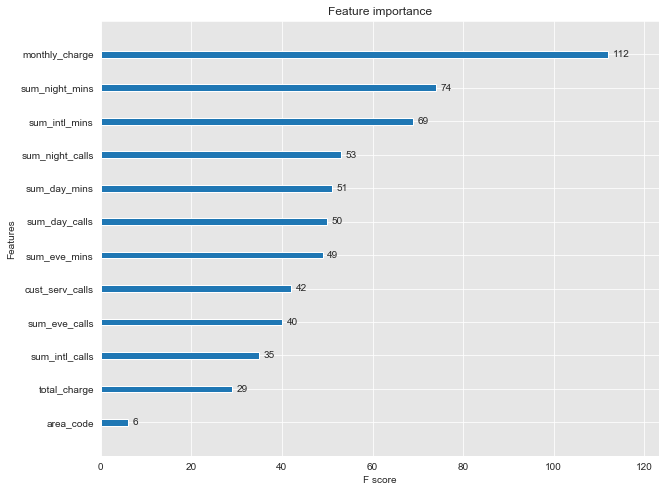

In [128]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xg, ax=ax)

In [129]:
im_df.head()

,monthly_charge,sum_intl_mins,total_charge,area_code,sum_eve_mins,sum_night_mins,sum_night_calls,sum_day_calls,sum_day_mins,cust_serv_calls,sum_intl_calls,sum_eve_calls,churn
0,75.56,10.0,9671.68,415,197.4,244.7,91,110,265.1,1,3,99,0.0
1,59.24,13.7,6338.68,415,195.5,254.4,103,123,161.6,1,3,103,0.0
2,62.29,12.2,8533.73,415,121.2,162.6,104,114,243.4,0,5,110,0.0
3,66.80,6.6,5611.20,408,61.9,196.9,89,71,299.4,2,7,88,0.0
4,52.09,10.1,3906.75,415,148.3,186.9,121,113,166.7,3,3,122,0.0


# Computing Importance with SHAP (SHapley Additive exPlanations) Values

In [130]:
X_display,y_display = shap.datasets.nhanesi(display=True)

In [131]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_test)

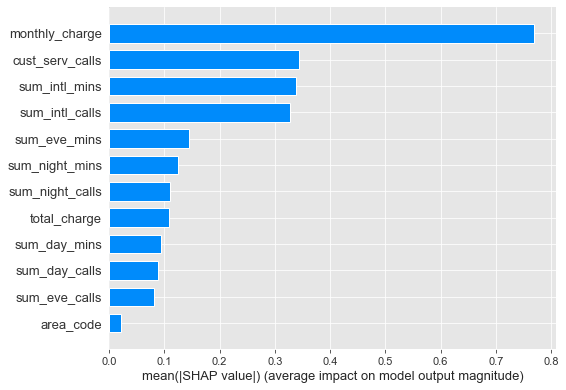

In [132]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Initiating Javascript

In [133]:
shap.initjs()

### Features Contributing to Pushing Model Output

The graph below shows features each contributing to push the model output from the base value to the model output. Features pushing the prediction higher are shown in red. Those pushing the prediction lower are in blue. This answers the question 'why?' when it comes to features affecting the outcome of the model.

In [134]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [135]:
X.shape

(3333, 12)

In [136]:
shap_interaction_values = shap.TreeExplainer(xg).shap_interaction_values(X)

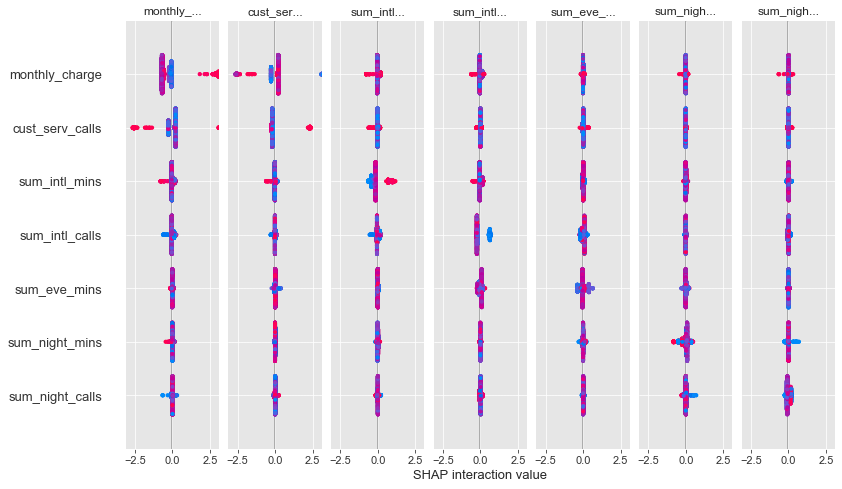

In [137]:
shap.summary_plot(shap_interaction_values, X)


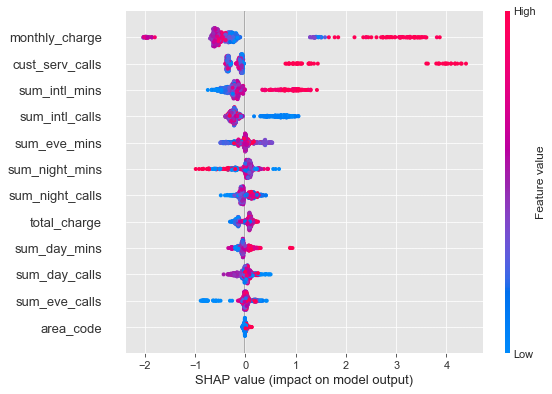

In [139]:
shap.summary_plot(shap_values, X_test)

### Observing Features by SHAP Values

### Contributors of High Customer Churn: Value of One

- High total number of day minutes
- High number of customer service calls
- Customers who have an international plan
- High number of night minutes
- High number of international minutes

### Contributors of Low Customer Churn: Value of Zero

- Customers with a voicemail plan
- Customers with higher number of voicemails
- High number of international calls

### Reading the SHAP Value Summary Plot

On the right hand side of the graph, the legend for feature value indicates that red is high feature value and blue is low feature value. On the y axis, the features are divided individually. The x axis at the bottom ranks how significant the impact is. Summarizing, blue on the far right of a feature would indicate that low feature value has a high impact of churn, while red would indicate that high feature value has a high impact of churn. 